# Auto ARIMA 예제
* 사용 데이터 : 월간 샴페인 판매량
    * Champagne_Sales.csv
* ARIMA p, d, q 차수를 지정한 범위 내에서 성능을 비교하여 자동으로 선정
* Seasonality data도 처리할 수 있음 : SARIMA

## 1. 학습 데이터 로드
* train, test data를 8:2 정도로 구분
* plot로 데이터 확인

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot
from pmdarima.arima import auto_arima

%matplotlib inline

In [2]:
#Read the sales dataset
sales_data = pd.read_csv("Champagne_Sales.csv")

In [3]:
sales_data.dtypes

Month              object
Champagne sales     int64
dtype: object

In [4]:
#Convert the month column to datetime
sales_data['Month'] = pd.to_datetime(sales_data['Month'])

In [5]:
sales_data.dtypes

Month              datetime64[ns]
Champagne sales             int64
dtype: object

In [6]:
#Set the index of the Month 
sales_data.set_index('Month', inplace=True)

In [7]:
#Spliting the dataset into train and test
train_data = sales_data[:85]
test_data = sales_data[-20:]

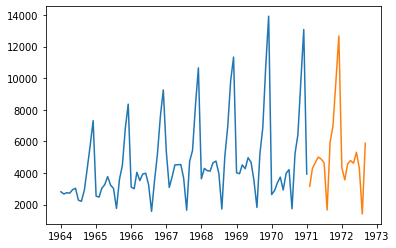

In [8]:
pyplot.plot(train_data)
pyplot.plot(test_data)
pyplot.show()

## 2. train data에 대한 분석
* Stationary 여부 확인 : pmdarima.arima.ADFTest 사용

In [9]:
#Testing for stationarity
from pmdarima.arima import ADFTest

adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(train_data)

(0.01, False)

In [10]:
help(adf_test.should_diff)

Help on method should_diff in module pmdarima.arima.stationarity:

should_diff(x) method of pmdarima.arima.stationarity.ADFTest instance
    Test whether the time series is stationary or needs differencing.
    
    Parameters
    ----------
    x : array-like, shape=(n_samples,)
        The time series vector.
    
    Returns
    -------
    pval : float
        The computed P-value of the test.
    
    sig : bool
        Whether the P-value is significant at the ``alpha`` level.
        More directly, whether to difference the time series.



## 3. Auro ARIMA의 탐색 범위 설정
* ARIMA 차수 p : 0 ~ 5
* ARIMA 차수 d : 1 고정
* ARIMA 차수 q : 0 ~ 5
* Seasonality 차수 P : 0 ~ 5
* Seasonality 차수 D : 1 고정
* Seasonality 차수 Q : 0 ~ 5
* Seasonality 간격 m : 12 (이 경우는 년 단위 반복)

In [11]:
arima_model =  auto_arima(train_data, start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn', trace = True,
                          supress_warnings=True, stepwise = True,
                          random_state=20, n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.853, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1192.025, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.246, Time=0.32 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.731, Time=0.08 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.034, Time=0.26 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.700, Time=0.56 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.054, Time=0.15 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.769, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.721, Time=0.03 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.564, Time=0.35 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.81 sec


/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.634, Time=1.32 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1176.127, Time=0.34 sec
 ARIMA(1,1,3)(0,1,0)[12]             : AIC=1176.124, Time=0.46 sec
 ARIMA(0,1,3)(0,1,0)[12]             : AIC=1176.458, Time=0.19 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1176.656, Time=0.19 sec


/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(2,1,3)(0,1,0)[12]             : AIC=1180.593, Time=0.61 sec
 ARIMA(1,1,2)(0,1,0)[12] intercept   : AIC=inf, Time=0.23 sec

Best model:  ARIMA(1,1,2)(0,1,0)[12]          
Total fit time: 6.821 seconds


## 4. ARIMA(1, 1, 2)(0, 1, 0)[12] 로 결정
* Seasonality를 반영한 모델 : SARIMAX

In [12]:
#Summary of the model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.282
Date:                             Fri, 25 Sep 2020   AIC                           1174.564
Time:                                     22:23:09   BIC                           1183.670
Sample:                                          0   HQIC                          1178.189
                                              - 85                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8412      0.152     -5.543      0.000      -1.139      -0.544
ma.L1          0.0513      0.167      0.308      0.758      -0.275       0.378
ma.L2         -0.8673      0.086    -10.134      0.000      -1.035      -0.700
sigma2      5.862e+05   7.03e+04      8.342      0.000    4.48e+05    7.24e+05
===================================================================================
Ljung-Box (Q):                       49.92   Jarque-Bera (JB):                 8.55
Prob(Q):                              0.14   Prob(JB):                         0.01
Heteroskedasticity (H):               2.61   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 5. 예측 및 성능 평가
* R-squared 값 1은 완벽하게 예측하는 경우임 : 이 모델은 0.81 

In [13]:
# predict : next 20 steps
predict_result = arima_model.predict(n_periods = 20)

prediction = pd.DataFrame(predict_result,index=test_data.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
Month,
1971-02-01,2746.720939
1971-03-01,3247.921333
1971-04-01,3592.518261
1971-05-01,2800.886063
1971-06-01,3841.912530
1971-07-01,4088.030973
1971-08-01,1596.314090
1971-09-01,5090.010901
1971-10-01,6284.013275


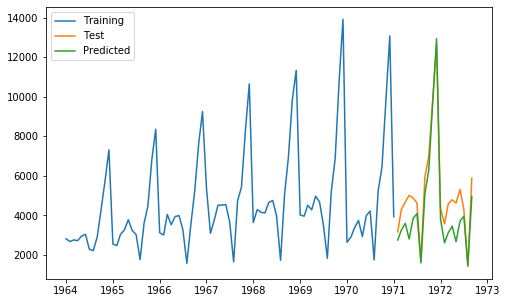

In [14]:
pyplot.figure(figsize=(8,5))
pyplot.plot(train_data, label="Training")
pyplot.plot(test_data, label="Test")
pyplot.plot(prediction, label="Predicted")
pyplot.legend(loc = 'upper left')
pyplot.show()

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate forecasts
rmse = sqrt(mean_squared_error(test_data, prediction))
print('RMSE: %.3f' % rmse)

RMSE: 1060.233


In [16]:
from sklearn.metrics import r2_score

r2_score_ret = r2_score(test_data, prediction)
print('R2 Score: %.5f' % r2_score_ret)

R2 Score: 0.81148
